In [1]:
import re

In [2]:
string = "tiger is the national animal of india"
pattern = "tiger"

mo = re.match(pattern, string)
print(mo)

<_sre.SRE_Match object; span=(0, 5), match='tiger'>


In [3]:
string = "tiger is the national animal of india"
pattern = "national"

mo = re.search(pattern, string)
print(mo)

<_sre.SRE_Match object; span=(13, 21), match='national'>


In [5]:
string = "tiger is the national animal of india and national sports is hockey"
pattern = "national"

mo = re.findall(pattern, string)
print(mo)

['national', 'national']


In [6]:
mo = re.finditer(pattern, string)

In [7]:
for m in mo:
    print(m.start())

13
42


In [8]:
string = "Ron was born on 12-09-1992 and he was admitted to school on 15-12-1999"
pattern = "\d{2}-\d{2}-\d{4}"
mo = re.findall(pattern, string)
print(mo)

['12-09-1992', '15-12-1999']


In [9]:
re.sub(pattern, "monday", string)

'Ron was born on monday and he was admitted to school on monday'

In [10]:
#corpus, Tokens, Ngrams
#corpus: collection of text documents
    #ex: twitter data is a corpus
    #corpus consists of documents
    #documents consists of paragraphs
    #paragraphs consists of sentences
    #sentences consists of tokens
    #tokens can be words, phrases, ngrams
    #ngrams : combination  of n words / characters together
    #sentence: i love my phone
    #unigrams(n=1):  i, love,my,phone
    #bigrams(n=2): i love,love my, my phone.
    #trigrams(n=3): i love my,love my phone.

In [11]:
#Tokenization
#It is a process of splitting a text object into a smaller units(tokens)
#ex:words,numbers,symbols,ngrams,characters
#most commonly used tokenization is white space tokenizer / unigram tokenizer


In [12]:
import pandas as pd

In [14]:
dataset = pd.read_csv(r'C:\Users\vinee\OneDrive\Desktop\Datasets\tweets.csv',encoding = 'ISO-8859-1')

In [15]:
dataset.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,11/23/2016 18:40,False,NaN,8.014960e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,11/23/2016 18:40,False,NaN,8.014960e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,11/23/2016 18:40,False,NaN,8.014960e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,11/23/2016 18:39,False,NaN,8.014960e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,11/23/2016 18:39,False,NaN,8.014950e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [16]:
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(dataset.text.str)

RT                         11053
to                          7650
is                          5152
in                          4491
the                         4330
of                          4052
#Demonetization             3253
demonetization              3161
on                          2751
#demonetization             2474
PM                          2384
Modi                        2379
India                       2243
and                         2218
a                           2180
that                        2168
out                         1729
for                         1672
so                          1599
had                         1598
who                         1591
Narendra                    1564
by                          1488
rich                        1477
find                        1421
Dear                        1407
implement                   1399
actually                    1370
have                        1315
@evanspiegel                1306
          

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

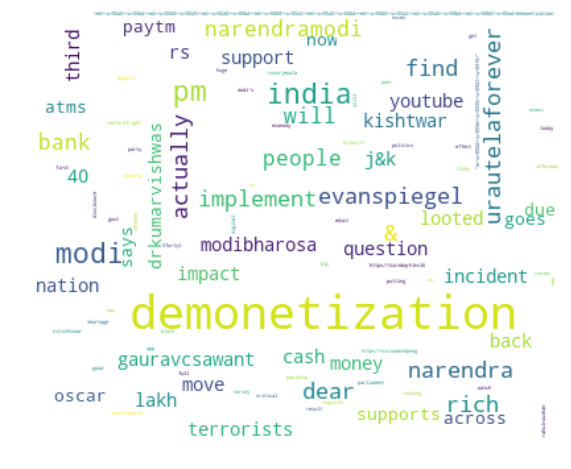

In [45]:
#Generate word cloud
wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
def clean_text(text):
    #Remove RT
        text = re.sub(r'RT', '', text)
    
    #Fix &
        text = re.sub(r'&amp;', '&', text)
    
    #Remove punctuations
        text = re.sub(r'[?!.;:,#@-]', '', text)
 
    #Convert to lowercase to maintain consistency
        text = text.lower()
        return text

In [42]:
clean_text(dataset['text'][0])

" rssurjewala critical question was paytm informed about demonetization edict by pm it's clearly fishy and requires full disclosure &\x85"

In [31]:
len(dataset['text'])

14940

In [43]:
from wordcloud import STOPWORDS

print(STOPWORDS)

{'ought', 'here', 'same', 'ourselves', 'until', 'would', 'k', 'those', "we're", 'be', "when's", "it's", "doesn't", 'so', 'but', 'his', 'hers', "where's", 'than', 'through', 'themselves', 'because', "don't", 'shall', "there's", "why's", 'i', "i've", "how's", 'into', "you'd", "shan't", 'do', "let's", "i'll", 'any', 'she', 'not', 'since', "you've", 'com', "here's", "can't", 'doing', 'www', 'him', 'did', 'over', 'should', 'as', 'while', 'my', "she'll", 'nor', 'to', "he'd", 'our', "who's", 'does', 'all', 'ever', 'could', 'itself', 'yourselves', 'where', 'were', 'he', 'there', "they'd", 'whom', "aren't", 'them', 'ours', "mustn't", "they've", 'no', 'too', "we've", "didn't", 'in', "shouldn't", 'having', "we'd", 'few', "he's", "haven't", 'her', 'below', 'this', 'can', 'else', "weren't", 'before', 'own', 'myself', 'other', 'above', 'theirs', "you'll", "i'd", 'who', 'get', 'with', "i'm", 'off', "we'll", 'when', 'up', 'after', 'am', 'from', "what's", 'each', 'out', 'more', 'about', 'was', 'otherwi

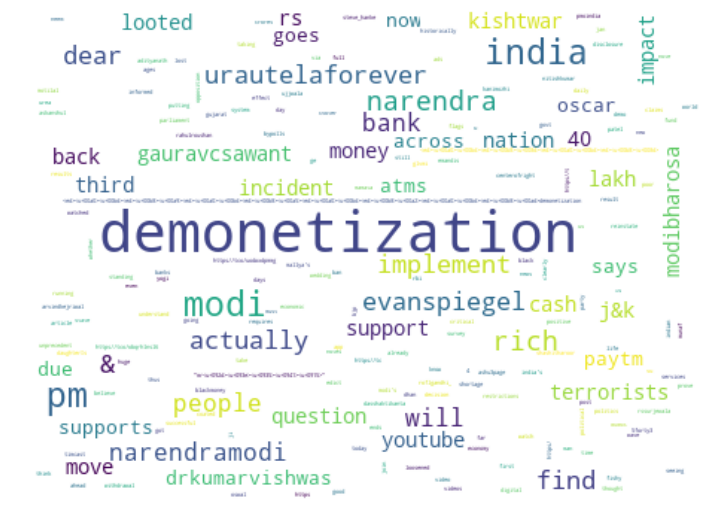

In [44]:
text = dataset.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()